# Homework Assignment 8

##**Question 1:** Select a book or a movie's subtitle, and find the locations that appear in the book/movie. Then, draw these locations on a map (at least 10 locations) (30pt). Connect the discovered locations with lines according to their order of appearance
in the book. For example, if location B appeared immediately after location A, then draw a line connecting locations A and B (20pt).

In [9]:
!pip install turicreate
!pip install spaCy
!pip install pymongo
!pip install geopandas
!pip install descartes
!pip install geopy
!pip install folium
!pip install imageio
!pip install dnspython

# Run this to make cartopy work with colab 
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!pip install --no-binary shapely shapely --force
!pip install afinn
!pip install nltk
!pip install plotly_express

!python -m spacy download en_core_web_lg # Important! you need to restart runtime after install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev i

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 827.9 MB 1.1 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [2]:
#setting up Kaggle & TuriCreate package s
import json
import os

!mkdir /root/.kaggle/
# Installing the Kaggle package

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"danasror","key":"83f2d5cd8d8b7d0c9848067dc056909f"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [10]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

import spacy
nlp = spacy.load('en_core_web_lg')

# !python -m spacy download en_core_web_lg # Important! you need to restart runtime after install

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#!mkdir ./datasets
!mkdir ./datasets/tarantino
# download the dataset from Kaggle and unzip it
!kaggle datasets download aadityanaik/shakespeareworks -p ./datasets/tarantino
!unzip ./datasets/tarantino/*.zip  -d ./datasets/tarantino

mkdir: cannot create directory ‘./datasets/tarantino’: No such file or directory
  0% 0.00/514k [00:00<?, ?B/s]
100% 514k/514k [00:00<00:00, 103MB/s]
Archive:  ./datasets/tarantino/shakespeareworks.zip
  inflating: ./datasets/tarantino/django_unchained_script.txt  
  inflating: ./datasets/tarantino/inglorious_basterds_script.txt  
  inflating: ./datasets/tarantino/pulp_fiction_script.txt  
  inflating: ./datasets/tarantino/reservoir_dogs_screenplay.txt  
  inflating: ./datasets/tarantino/tarantino_scripts.txt  


In [26]:
path = './datasets/tarantino/reservoir_dogs_screenplay.txt'

def get_entites_dict_from_text(text):
    entities_dict= {}
    #using spaCy to get entities
    doc = nlp(text)
    for entity in doc.ents:
        label = entity.label_
        e = entity.text.lower()
        if  label not in entities_dict:
            entities_dict[label] = {}
        if e not in entities_dict[label]:
            entities_dict[label][e] = 0
        entities_dict[label][e] += 1
    return entities_dict

dogs_txt = open(path,"r", encoding="utf8", errors="ignore").read()
e  = get_entites_dict_from_text(dogs_txt)
locations = list(e['GPE'])
locations

['greenbay',
 'china',
 'coon',
 'georgia',
 'the\nfuck outta',
 'costa rica',
 'nice',
 'p.o.',
 'long\nbeach',
 'vegas',
 'hamburg',
 'chicago',
 'holdaway',
 'gardena',
 'outta town',
 'wisconsin',
 'milwaukee',
 'portland',
 'los angeles',
 'santa cruz',
 'v.o.',
 'los angeles county\n',
 'los angeles county',
 'l.a.',
 'sacramento',
 'jodie',
 'gibraltar',
 'ladora heights',
 'beverly hills',
 'ladora heights\n',
 'palos verdes',
 'brooklyn',
 'poland',
 'st. petersburg',
 'b.g.']

In [14]:
len(dogs_txt)

102365

In [19]:
for i in range(0,len(locations)):
  locations[i] = locations[i].replace("\n"," ")
locations

['greenbay',
 'china',
 'coon',
 'georgia',
 'the fuck outta',
 'costa rica',
 'nice',
 'p.o.',
 'long beach',
 'vegas',
 'hamburg',
 'chicago',
 'holdaway',
 'gardena',
 'outta town',
 'wisconsin',
 'milwaukee',
 'portland',
 'los angeles',
 'santa cruz',
 'v.o.',
 'los angeles county ',
 'los angeles county',
 'l.a.',
 'sacramento',
 'jodie',
 'gibraltar',
 'ladora heights',
 'beverly hills',
 'ladora heights ']

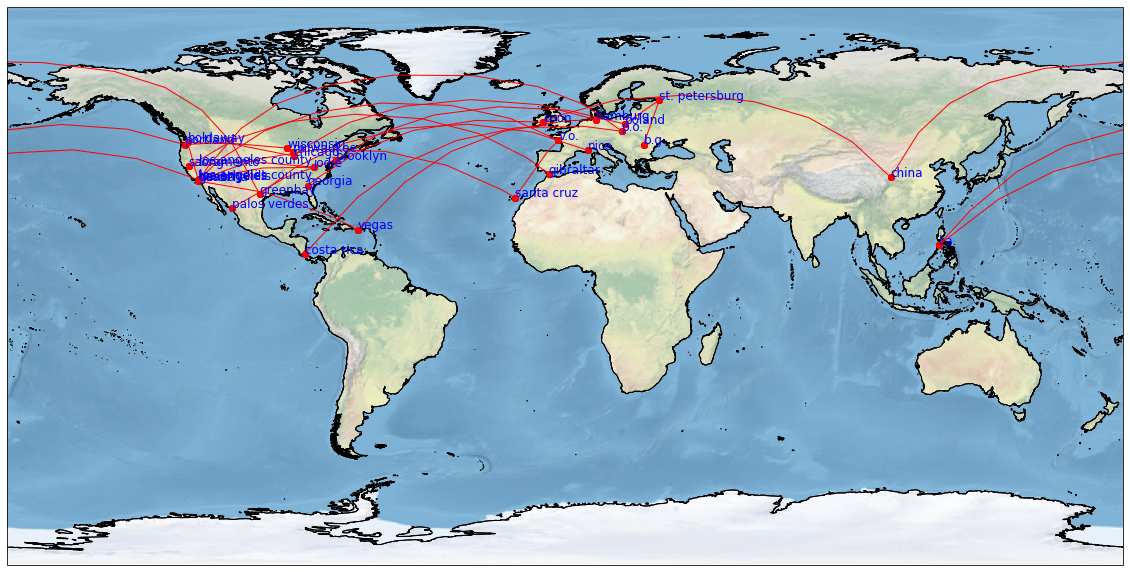

In [27]:
from geopy import Nominatim
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

geolocator = Nominatim(timeout=3)

plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.coastlines(resolution='10m', color='black', linewidth=1) # draw with batter coaslines resolution
ax.stock_img() # add colors 

for l in locations:
    location = geolocator.geocode(l)
    if location:
        lon, lat, name =  location.longitude, location.latitude, l
        plt.plot(lon, lat,
            color='black', marker='o', markersize=6,transform=ccrs.PlateCarree(),
            )
        ax.text(lon, lat+0.2, name, fontsize=12, color="blue", transform=ccrs.PlateCarree(),)

ax.coastlines(resolution='10m', color='black', linewidth=1) # draw with batter coaslines resolution

# we will determine the order of apperance by the index
# of first occurence of each location
location_index = {}
for l in locations:
    try:
        location_index[l] = dogs_txt.lower().index(l)
    except:
        pass
location_index

import operator
# sort by index of substring
sorted_locations = list(sorted(location_index.items(), key=operator.itemgetter(1)))

# draw lines by each two following items
for i in range(len(sorted_locations) - 1):
    a = geolocator.geocode(sorted_locations[i][0])
    b = geolocator.geocode(sorted_locations[i+1][0])

    if a and b:
        plt.plot([a.longitude, b.longitude], [a.latitude, b.latitude],
            color='red', linewidth=1, marker='o',
            transform=ccrs.Geodetic(),
            )

*********************************

##**Question 2:** Select a country's' statistic from the [World Development Indicators dataset](https://www.kaggle.com/worldbank/world-development-indicators) (Please notice there are several files in the dataset, such as _Indicators.csv_).
Then, create a choropleth map displaying how the selected statistics changed over time (15pt) 
    
**Bonus:** Create a short animation that displays how the chosen statistics changed over time (15pt)

In [28]:
!mkdir datasets/worlddev
!kaggle datasets download kaggle/world-development-indicators -p ./datasets/worlddev
!unzip ./datasets/worlddev/*.zip  -d ./datasets/worlddev/
!ls ./datasets/worlddev/

 95% 349M/369M [00:02<00:00, 160MB/s]
100% 369M/369M [00:02<00:00, 144MB/s]
Archive:  ./datasets/worlddev/world-development-indicators.zip
  inflating: ./datasets/worlddev/Country.csv  
  inflating: ./datasets/worlddev/CountryNotes.csv  
  inflating: ./datasets/worlddev/Footnotes.csv  
  inflating: ./datasets/worlddev/Indicators.csv  
  inflating: ./datasets/worlddev/Series.csv  
  inflating: ./datasets/worlddev/SeriesNotes.csv  
  inflating: ./datasets/worlddev/database.sqlite  
  inflating: ./datasets/worlddev/hashes.txt  
Country.csv	  Footnotes.csv   Series.csv
CountryNotes.csv  hashes.txt	  SeriesNotes.csv
database.sqlite   Indicators.csv  world-development-indicators.zip


In [30]:
!pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import turicreate as tc

sf = tc.SFrame.read_csv("./datasets/worlddev/Indicators.csv", )
sf = sf.filter_by('Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorName')
sf

Finished parsing file /content/datasets/worlddev/Indicators.csv

Parsing completed. Parsed 100 lines in 2.403 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,int,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 528165 lines. Lines per second: 256301

Read 3128826 lines. Lines per second: 434628

Finished parsing file /content/datasets/worlddev/Indicators.csv

Parsing completed. Parsed 5656458 lines in 11.7009 secs.

Columns:
	CountryName	str
	CountryCode	str
	IndicatorName	str
	IndicatorCode	str
	Year	int
	Value	float

Rows: 12485

Data:
+--------------------------------+-------------+-------------------------------+
|          CountryName           | CountryCode |         IndicatorName         |
+--------------------------------+-------------+-------------------------------+
|           Arab World           |     ARB     | Adolescent fertility rate ... |
|     Caribbean small states     |     CSS     | Adolescent fertility rate ... |
| Central Europe and the Baltics |     CEB     | Adolescent fertility rate ... |
| East Asia & Pacific (all i...  |     EAS     | Adolescent fertility rate ... |
| East Asia & Pacific (devel...  |     EAP     | Adolescent fertility rate ... |
|           Euro area            |     EMU     | Adolescent fertility rate ... |
| Europe & Central Asia (all...  |     ECS     | Adolescent fertility rate ... |
| Europe & Central Asia (dev...  |     ECA     | Adolescent fertility rate ... |
|         European Union         |     EUU     | Adolescent fertility rate ... |
| Fragile and conflict affec...  |     FCS     | Adolescent fertility rate ... |
+--------------------------------+-------------+-------------------------------+
+---------------+------+--------------------+
| IndicatorCode | Year |       Value        |
+---------------+------+--------------------+
|  SP.ADO.TFRT  | 1960 | 133.56090740552298 |
|  SP.ADO.TFRT  | 1960 |  162.871211572184  |
|  SP.ADO.TFRT  | 1960 |  46.716751611392   |
|  SP.ADO.TFRT  | 1960 |  66.0159744792058  |
|  SP.ADO.TFRT  | 1960 |  75.0436305499244  |
|  SP.ADO.TFRT  | 1960 | 27.301838429626603 |
|  SP.ADO.TFRT  | 1960 |  42.0300522262526  |
|  SP.ADO.TFRT  | 1960 |  62.243602066685   |
|  SP.ADO.TFRT  | 1960 |  38.9987768165909  |
|  SP.ADO.TFRT  | 1960 |  141.09417161608   |
+---------------+------+--------------------+
[12485 rows x 6 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [31]:
import plotly_express as px
# import pycountry

df = sf.to_dataframe()
px.choropleth(df, locations='CountryCode', locationmode='ISO-3', color='Value',  animation_frame='Year')

##**Question 3:** Select a request type from [San Francisco 311 dataset](https://www.kaggle.com/datasf/case-data-from-san-francisco-311).
Create an interactive map that somehow presents in which areas this request occurs the most (35pt).

In [32]:
!mkdir ./datasets
!mkdir ./datasets/san_fransisco

# download the dataset from Kaggle and unzip it
!kaggle datasets download -d datasf/case-data-from-san-francisco-311 -p ./datasets/san_fransisco
!unzip ./datasets/san_fransisco/*.zip  -d ./datasets/san_fransisco/

mkdir: cannot create directory ‘./datasets’: File exists
 91% 112M/122M [00:00<00:00, 160MB/s] 
100% 122M/122M [00:00<00:00, 144MB/s]
Archive:  ./datasets/san_fransisco/case-data-from-san-francisco-311.zip
  inflating: ./datasets/san_fransisco/Case_Data_from_San_Francisco_311__SF311.csv  
  inflating: ./datasets/san_fransisco/Shapefiles (2)/Analysis Neighborhoods/geo_export_7c3449d4-91cf-4b41-8929-3a62ae10c1ca.dbf  
  inflating: ./datasets/san_fransisco/Shapefiles (2)/Analysis Neighborhoods/geo_export_7c3449d4-91cf-4b41-8929-3a62ae10c1ca.prj  
  inflating: ./datasets/san_fransisco/Shapefiles (2)/Analysis Neighborhoods/geo_export_7c3449d4-91cf-4b41-8929-3a62ae10c1ca.shp  
  inflating: ./datasets/san_fransisco/Shapefiles (2)/Analysis Neighborhoods/geo_export_7c3449d4-91cf-4b41-8929-3a62ae10c1ca.shx  
  inflating: ./datasets/san_fransisco/Shapefiles (2)/Supervisor Districts as of April 2012/geo_export_38fd3153-0303-488e-9f3c-0f81e8e00115.dbf  
  inflating: ./datasets/san_fransisco/Shapefi

Finished parsing file /content/datasets/san_fransisco/Case_Data_from_San_Francisco_311__SF311.csv

Parsing completed. Parsed 100 lines in 2.40459 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,str,str,str,str,str,str,str,int,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 189228 lines. Lines per second: 95713.7

Unexpected characters after last column. "Abandoned Vehicle - Car4door"
Parse failed at token ending at: 
	s Work Queue,Abandoned Vehicle,Abandoned Vehicle - Car4door,^Gray - Volkswagen -  - 7MJV079,Intersection of 2
Successfully parsed 16 tokens: 
	0: 5526685
	1: 02/02/2016 ... 5:55:47 AM
	2: 02/03/2016 ... 1:21:40 AM
	3: 02/03/2016 ... 1:21:40 AM
	4: Closed
	5: "Case Reso ... 1256715196
	6: -122.391840449142)"
	7: Voice In
	8: 5698025
	9: 03/24/2016 ... 8:34:48 PM
	10: 03/29/2016 ... 8:25:01 AM
	11: 3
	12: Closed
	13: DPT Abando ...       #229
	14: DPT Abando ... Work Queue
	15: Abandoned Vehicle

Unable to interpret "Environmental Health-DPH" as a integer
Parse failed at token ending at: 
	 Environmental Health-DPH^
Successfully parsed 0 tokens:

Unable to interpret "(415)-252-380"" as a integer
Parse failed at token ending at: 
	 (415)-252-380",^DPH - Environmental Health - G,General Requests,
Successfully parsed 0 tokens:

Unable to interpret "Environmental Health-DPH" as a integer
Parse failed at token ending at: 
	 Environmental Health-DPH^
Successfully parsed 0 tokens:

Unable to interpret "(415)-252-380"" as a integer
Parse failed at token ending at: 
	 (415)-252-380",^DPH - Environmental Health - G,Noise Report,mech
Successfully parsed 0 tokens:

Unexpected characters after last column. "DPW Ops Queue"
Parse failed at token ending at: 
	:00:36 AM,Closed,Case Resolved - duplicate sr,DPW Ops Queue,^Street and Sidewalk Cleaning,Illegal Encampment,
Successfully parsed 16 tokens: 
	0: 415
	1: DPH - Envi ... Health - G
	2: Street and ... k Cleaning
	3: Hazardous Materials
	4: Needles
	5: Intersecti ... and 8TH ST
	6: 10
	7: Showplace Square
	8: (37.767300 ... 428647996)
	9: Voice In
	10: 5698219
	11: 3
	12: 03/25/2016 ... 7:00:36 AM
	13: 03/25/2016 ... 7:00:36 AM
	14: Closed
	15: Case Resol ... plicate sr

Unexpected characters after last column. "DPW Ops Queue"
Parse failed at token ending at: 
	/2016 01:00:00 AM,Closed,Case Resolved - done,DPW Ops Queue,^Street and Sidewalk Cleaning,Hazardous Materials
Successfully parsed 16 tokens: 
	0: 415
	1: DPH - Envi ... Health - G
	2: Street and ... k Cleaning
	3: Hazardous Materials
	4: Needles
	5: Intersecti ...  HOWARD ST
	6: 6
	7: South of Market
	8: (37.773100 ... 561380814)
	9: Voice In
	10: 5698609
	11: 3
	12: 03/29/2016 ... 1:00:00 AM
	13: 03/29/2016 ... 1:00:00 AM
	14: Closed
	15: Case Resolved - done

Unable to interpret "Environmental Health-DPH" as a integer
Parse failed at token ending at: 
	 Environmental Health-DPH^
Successfully parsed 0 tokens:

Unable to interpret "(415)-252-380"" as a integer
Parse failed at token ending at: 
	 (415)-252-380",^DPH - Environmental Health - G,Noise Report,garb
Successfully parsed 0 tokens:

Unable to interpret "Environmental Health-DPH" as a integer
Parse failed at token ending at: 
	 Environmental Health-DPH^
Successfully parsed 0 tokens:

Read 1043264 lines. Lines per second: 145057

16596 lines failed to parse correctly

Finished parsing file /content/datasets/san_fransisco/Case_Data_from_San_Francisco_311__SF311.csv

Parsing completed. Parsed 1161482 lines in 9.58086 secs.

Columns:
	Request Type	str
	Count	int

Rows: 1287

Data:
+-------------------------------+-------+
|          Request Type         | Count |
+-------------------------------+-------+
|     Red Color Curb Request    |   1   |
| mta - parking_meter_cards ... |   22  |
| (37.728637610218, -122.431... |   2   |
| labor_standards_enforcemen... |   7   |
| Construction Zone Tow-away... |   8   |
| planning - planning - requ... |  153  |
|         Sewage_back_up        | 17838 |
| cityadministrator_GSA - ci... |   1   |
|         City_Can_Other        |  879  |
| Construction Zone Tow-away... |   1   |
+-------------------------------+-------+
[1287 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

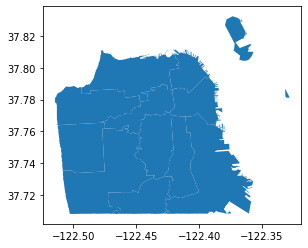

In [53]:
import folium
import geopandas
import turicreate as tc
import turicreate.aggregate as agg

gdf = geopandas.read_file("./datasets/san_fransisco/Shapefiles (2)/Supervisor Districts as of April 2012/geo_export_38fd3153-0303-488e-9f3c-0f81e8e00115.shp")
gdf.plot()
sf = tc.SFrame.read_csv("./datasets/san_fransisco/Case_Data_from_San_Francisco_311__SF311.csv")
sf.dropna()

req_count_sf = sf.groupby('Request Type', {'Count': agg.COUNT()})
req_count_sf

In [54]:
max = req_count_sf['Count'].max()
req_name = ""
for req in req_count_sf:
  if req['Count'] == max:
      req_name = req['Request Type']

req_name

'Sidewalk_Cleaning'

In [55]:
# Select a request type from San Francisco 311 dataset.
Sidewalk_Cleaning_req = sf[sf['Request Type'] == 'Sidewalk_Cleaning']
# Select a request type from San Francisco 311 dataset.
Sidewalk_Cleaning_req['new_Point'] = Sidewalk_Cleaning_req['Point'].apply(lambda s: get_points(s))
Sidewalk_Cleaning_req

Columns:
	CaseID	int
	Opened	str
	Closed	str
	Updated	str
	Status	str
	Status Notes	str
	Responsible Agency	str
	Category	str
	Request Type	str
	Request Details	str
	Address	str
	Supervisor District	int
	Neighborhood	str
	Point	str
	Source	str
	Media URL	str
	new_Point	array

Rows: 171590

Data:
+--------+------------------------+------------------------+
| CaseID |         Opened         |         Closed         |
+--------+------------------------+------------------------+
| 322566 | 11/30/2008 10:56:00 PM | 07/21/2009 04:24:00 PM |
| 322556 | 11/30/2008 09:34:00 PM | 12/09/2008 08:07:00 AM |
| 322545 | 11/30/2008 08:45:00 PM | 02/03/2009 07:09:00 AM |
| 322543 | 11/30/2008 08:43:00 PM | 02/03/2009 07:09:00 AM |
| 322514 | 11/30/2008 07:08:00 PM | 12/03/2008 06:07:00 AM |
| 322511 | 11/30/2008 06:50:00 PM | 12/01/2008 04:24:00 PM |
| 322505 | 11/30/2008 06:04:00 PM | 12/01/2008 06:07:00 AM |
| 322499 | 11/30/2008 05:34:00 PM | 11/30/2008 07:06:00 PM |
| 322488 | 11/30/2008 04:46:00 PM | 12/01/2008 06:07:00 AM |
| 322484 | 11/30/2008 04:22:00 PM | 12/01/2008 06:07:00 AM |
+--------+------------------------+------------------------+
+------------------------+--------+--------------+--------------------+
|        Updated         | Status | Status Notes | Responsible Agency |
+------------------------+--------+--------------+--------------------+
| 07/21/2009 04:24:00 PM | Closed |              |   DPW Ops Queue    |
| 12/09/2008 08:07:00 AM | Closed |              |   DPW Ops Queue    |
| 02/03/2009 07:09:00 AM | Closed |              |   DPW Ops Queue    |
| 02/03/2009 07:09:00 AM | Closed |              |   DPW Ops Queue    |
| 12/03/2008 06:07:00 AM | Closed |              |   DPW Ops Queue    |
| 12/01/2008 04:24:00 PM | Closed |              |   DPW Ops Queue    |
| 12/01/2008 06:07:00 AM | Closed |              |   DPW Ops Queue    |
| 11/30/2008 07:06:00 PM | Closed |              |   DPW Ops Queue    |
| 12/01/2008 06:07:00 AM | Closed |              |   DPW Ops Queue    |
| 12/01/2008 06:07:00 AM | Closed |              |   DPW Ops Queue    |
+------------------------+--------+--------------+--------------------+
+------------------------------+-------------------+----------------------+
|           Category           |    Request Type   |   Request Details    |
+------------------------------+-------------------+----------------------+
| Street and Sidewalk Cleaning | Sidewalk_Cleaning |       Garbage        |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning | Human_waste_or_urine |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning |      Empty_cart      |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning |       Garbage        |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning |       Mattress       |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning | Human_waste_or_urine |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning |       Mattress       |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning |    Medical_waste     |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning |       Garbage        |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning | Human_waste_or_urine |
+------------------------------+-------------------+----------------------+
+-------------------------------+---------------------+------------------+
|            Address            | Supervisor District |   Neighborhood   |
+-------------------------------+---------------------+------------------+
| 1566 HYDE ST, SAN FRANCISC... |          3          |     Nob Hill     |
| Intersection of 25TH ST an... |          9          |     Mission      |
| Intersection of 19TH ST an... |          8          |     Mission      |
| Intersection of 18TH ST an... |          8          |     Mission      |
| Intersection of 26TH ST an... |          8          |     Mission      |
|  647 MINNA ST, SAN FRANCIS... |          6          | South of Market  |
| Intersection of DIVISADERO... |          5          | Western Addition |
| Intersection of MOUNT VER

In [46]:
#  Create an interactive map that somehow presents in which areas this request occurs the most (35pt).

from folium.plugins import HeatMap

tiles = 'Stamen Terrain'
m = folium.Map(location=[0,0], zoom_start=2, tiles = tiles)
data = [(r['new_Point'][0],r['new_Point'][1]) for r in Sidewalk_Cleaning_req[:300000]]
HeatMap(data, radius = 10).add_to(m)

m